<a href="https://colab.research.google.com/github/Shnku/pythoning_stuff/blob/proj/NN/v2Test_BuildingImageRecognizationof_Batch_Test_WithoutWeightFreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Trained model for CNC buildings

In [ ]:
import numpy as np
import torch
from imageio import imread
from matplotlib import pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    precision_score,
)
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet152
from tqdm import tqdm

In [ ]:
# PATH_TO_PRETRAINED_WEIGHTS = 'resnet_model_weight_for_cnc_BatchSize64_Iterations400_lr1e-5.pth'
PATH_TO_PRETRAINED_WEIGHTS = "resnet_model_weight_for_cnc_WithOut_Weight_Freeze.pth"
CUDA_DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 1

In [ ]:
transform_function = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [ ]:
dataset_for_cnc_building_test = ImageFolder(
    root="Testing", transform=transform_function
)

In [ ]:
dataset_for_cnc_building_test.classes

['Administrative_test',
 'Chemistry_test',
 'Gurudeb_test',
 'Heritage_test',
 'canteen_test']

In [ ]:
dataloader_for_cnc_building_test = DataLoader(
    dataset=dataset_for_cnc_building_test,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [ ]:
resnet_model_for_cnc = resnet152()

In [ ]:
resnet_model_for_cnc.requires_grad_(requires_grad=False)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

The `requires_grad_()` method is a function of PyTorch modules (like the layers within a neural network). **Setting` requires_grad=False `means that the parameters of the `resnet_model_for_cnc` will not have their gradients computed during the backward pass.**

In the context of training a neural network, gradients are essential for updating the model's weights through optimization algorithms like stochastic gradient descent. However, when you are testing or evaluating a pre-trained model, you do not need to compute gradients and update the weights. Setting `requires_grad=False` effectively **"freezes"** the weights of the model.   

*This is commonly done when you are using a pre-trained model for inference or as a feature extractor, to avoid unnecessary computations and memory usage associated with gradient calculation.*

In [ ]:
# resnet_model_for_cnc.fc.requires_grad_(requires_grad = True)

## Understanding Freezing in Neural Networks
In the context of neural networks, freezing refers to the process of preventing the parameters (weights and biases) of certain layers or modules within the network from being updated during the training process. When a layer is frozen, its parameters retain their current values and do not change as the model learns from the data.

### How Freezing Works
When you set the requires_grad attribute of a parameter or a module to False, as seen in the code with `.requires_grad_(requires_grad=False)`, you are telling the deep learning framework (like PyTorch) not to calculate and store gradients for that parameter during the backward pass of training. Without gradients, *the optimization algorithm (which uses gradients to determine how to adjust parameters) cannot update the parameter's value. Thus, the parameter is "frozen."*

### Why Freeze Layers?
Freezing is a common technique in various scenarios, particularly when using pre-trained models. Pre-trained models are neural networks that have already been trained on a large dataset for a specific task (like image classification on ImageNet). These models have learned to extract useful features from the input data.

### Here are some key reasons for freezing layers:

- **Transfer Learning:** When you use a pre-trained model for a new task, you might want to leverage the feature extraction capabilities learned from the original task. By freezing the initial layers (which often learn general features like edges and textures), you preserve these learned features. You then train only the later layers (like the fully connected layers) on your new, smaller dataset. This is known as transfer learning.

- **Reducing Training Time and Computational Resources:** Training a large neural network from scratch can be computationally expensive and time-consuming. By freezing a significant portion of the network, you reduce the number of parameters that need to be updated, which significantly speeds up the training process and requires less computational power.

- **Preventing Overfitting:** When working with smaller datasets, training the entire model can lead to overfitting, where the model learns to perform very well on the training data but generalizes poorly to new, unseen data. Freezing layers can help prevent overfitting by reducing the number of trainable parameters, making the model less prone to memorizing the training data.

### How Freezing Affects Results
The effect of freezing on the results depends on the specific task, the dataset, and which layers are frozen:

- **Improved Performance on New Tasks:** In transfer learning scenarios, freezing the early layers and training the later layers often leads to better performance on the new task compared to training a random initialization model or training the entire pre-trained model on a small dataset. The pre-trained features provide a strong starting point.

- **Faster Convergence:** Because fewer parameters are being updated, the training process tends to converge faster when layers are frozen.

- **Potential for Suboptimal Performance if Incorrect Layers are Frozen:** If you freeze layers that are crucial for the new task, or if the features learned by the frozen layers are not relevant to the new task, the model's performance might be suboptimal. Choosing which layers to freeze often requires experimentation.

- **Less Flexibility:** A fully frozen model acts purely as a feature extractor, and you are only training a classifier on top of these fixed features. While this is efficient, it might not be as flexible as fine-tuning the entire model (where some or all layers are unfrozen and trained with a very low learning rate).

In the provided code, `resnet_model_for_cnc.requires_grad_(requires_grad=False)` ***freezes the entire ResNet-152 model.***   
**This means that the model is being used solely as a feature extractor, and the subsequent code will likely define and train a new classification layer on top of the extracted features.**



In [ ]:
resnet_model_for_cnc.fc = torch.nn.Sequential(
    torch.nn.Linear(in_features=2048, out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(
        in_features=512,
        out_features=5,
    ),
    torch.nn.Softmax(dim=1),
)

In [ ]:
resnet_model_for_cnc.load_state_dict(
    torch.load(PATH_TO_PRETRAINED_WEIGHTS, map_location=CUDA_DEVICE)
)

<All keys matched successfully>

In [ ]:
resnet_model_for_cnc.to(device=CUDA_DEVICE)
resnet_model_for_cnc.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# PATH_TO_AN_IMAGE = 'Testing/Gurudeb_test/1573997205phpwpx89U.jpeg'

In [ ]:
# input_image = imread(PATH_TO_AN_IMAGE)

In [ ]:
# input_image.shape

In [ ]:
actual_label = []
predicted_label = []
for test_image, test_label in tqdm(dataloader_for_cnc_building_test):
    test_output = resnet_model_for_cnc(test_image.to(device=CUDA_DEVICE))
    test_class_index = torch.argmax(test_output, dim=1).item()
    actual_label.append(test_label.item())
    predicted_label.append(test_class_index)

100%|█████████████████████████████████████████| 164/164 [00:51<00:00,  3.21it/s]


In [ ]:
confusion_matrix_of_building_classification = confusion_matrix(
    actual_label,
    predicted_label,
    # normalize = "all"
)

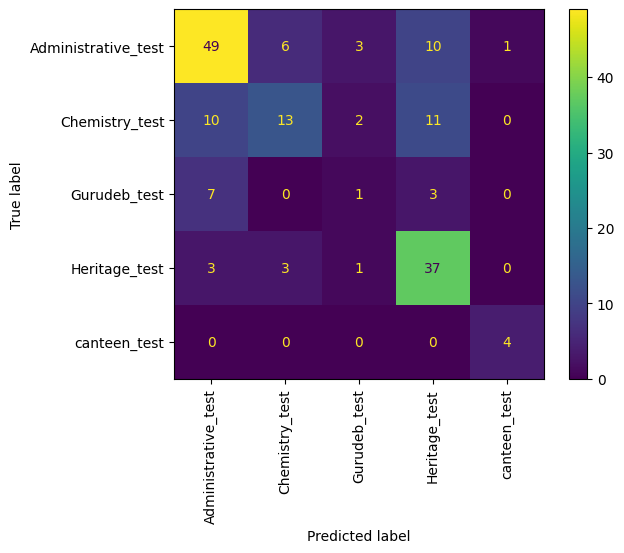

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix_of_building_classification,
    display_labels=dataset_for_cnc_building_test.classes,
).plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(
    classification_report(
        actual_label,
        predicted_label,
        target_names=dataset_for_cnc_building_test.classes,
    )
)

                     precision    recall  f1-score   support

Administrative_test       0.71      0.71      0.71        69
     Chemistry_test       0.59      0.36      0.45        36
       Gurudeb_test       0.14      0.09      0.11        11
      Heritage_test       0.61      0.84      0.70        44
       canteen_test       0.80      1.00      0.89         4

           accuracy                           0.63       164
          macro avg       0.57      0.60      0.57       164
       weighted avg       0.62      0.63      0.62       164



In [ ]:
transformed_image = transform_function(input_image)

NameError: name 'input_image' is not defined

In [ ]:
transformed_image.shape

In [ ]:
transformed_image = transformed_image.unsqueeze(dim=0)

In [ ]:
transformed_image.dtype

In [ ]:
predicted_output = resnet_model_for_cnc(transformed_image.to(device=CUDA_DEVICE))

In [ ]:
torch.argmax(predicted_output, dim=1).item()

In [ ]:
predicted_output